# Fuga de Clientes Telecomunicaciones

## Importar Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar data

In [3]:
df_client = pd.read_csv('./telecom_customer_churn.csv', sep= ';')

## 1. Manipulación de los Datos

In [4]:
df_client.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590-VHVEG
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,5575-GNVDE
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668-QPYBK
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795-CFOCW
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237-HQITU


***Diccionario de Datos***:
* **Churn**: Si el cliente abandonó o no (Sí o No).<br>
* **CustomerID**: Identificación del cliente.<br>
* **Gender**: Si el cliente es hombre o mujer.<br>
* **SeniorCitizen**: Si el cliente es adulto mayor o no.<br>
* **Partner**: Si el cliente tiene pareja o no (Sí o No).<br>
* **Dependets**: Si el cliente tiene dependientes o no (Sí o No).
* **Tenure**: Número de meses que el cliente ha permanecido en la empresa.<br>
* **PhoneService**: Si el cliente tiene servicio telefónico o no (Sí o No).<br>
* **MultipleLines**: Si el cliente tiene varias líneas o no (Sí o No, Sin servicio telefónico).<br>
* **InternetService**: Proveedor de servicios de Internet del cliente (DSL, Fibra óptica, No).<br>
* **OnlineSecurity**: Si el cliente tiene seguridad en línea o no (Sí o No, Sin servicio de Internet).<br>
* **OnlineBackup**: Si el cliente tiene respaldo en línea o no (Sí o No, Sin servicio de Internet).<br>
* **DeviceProtection**: Si el cliente tiene protección de dispositivo o no (Sí o No, Sin servicio de Internet).<br>
* **TechSupport**: Si el cliente cuenta con soporte técnico o no (Sí o No, Sin servicio de internet).<br>
* **StreamingTV**: Si el cliente tiene transmisión de TV o no (Sí o No, Sin servicio de Internet).<br>
* **StreamingMovies**: Si el cliente tiene películas en streaming o no (Sí o No, Sin servicio de Internet).<br>
* **Contract**: El plazo del contrato del cliente (Mes a mes, Un año, Dos años).<br>
* **Paperlessbilling**: Si el cliente tiene facturación electrónica o no (Sí o No).<br>
* **PaymentMethod**: El método de pago del cliente (Cheque electrónico, Cheque enviado por correo, Transferencia bancaria).<br>
* **MonthlyChargues**: El monto cobrado al cliente mensualmente.<br>
* **TotalChargues**: El importe total cobrado al cliente.

In [5]:
df_client.shape

(7043, 21)

*1. Hay 7043 clientes y 21 características o columnas.*

In [6]:
df_client.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
customerID           object
dtype: object

In [7]:
df_client.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'customerID'],
      dtype='object')

In [8]:
# Colocar a los idClientes en el index: Porque es un identificador único.
df_client.set_index(['customerID'], inplace= True)
df_client.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Observar los valores únicos por cada columna.
df_client.apply(lambda x: x.nunique())

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [10]:
# Recategorizar la variable objetivo Churn.
df_client['churEncoded'] = df_client['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

In [11]:
# Eliminamos la columna Churn.
df_client = df_client.drop(columns= ['Churn'], axis= 1)

## 2. Entendimiento de Datos

### 2.1. Variables Cuantitativas

In [12]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [13]:
# Observar la cantidad de nulos por columa
df_client.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
churEncoded          0
dtype: int64

*2. La columna TotalCharges tiene 11 registros nulos.*

In [14]:
import missingno as msno

<Axes: >

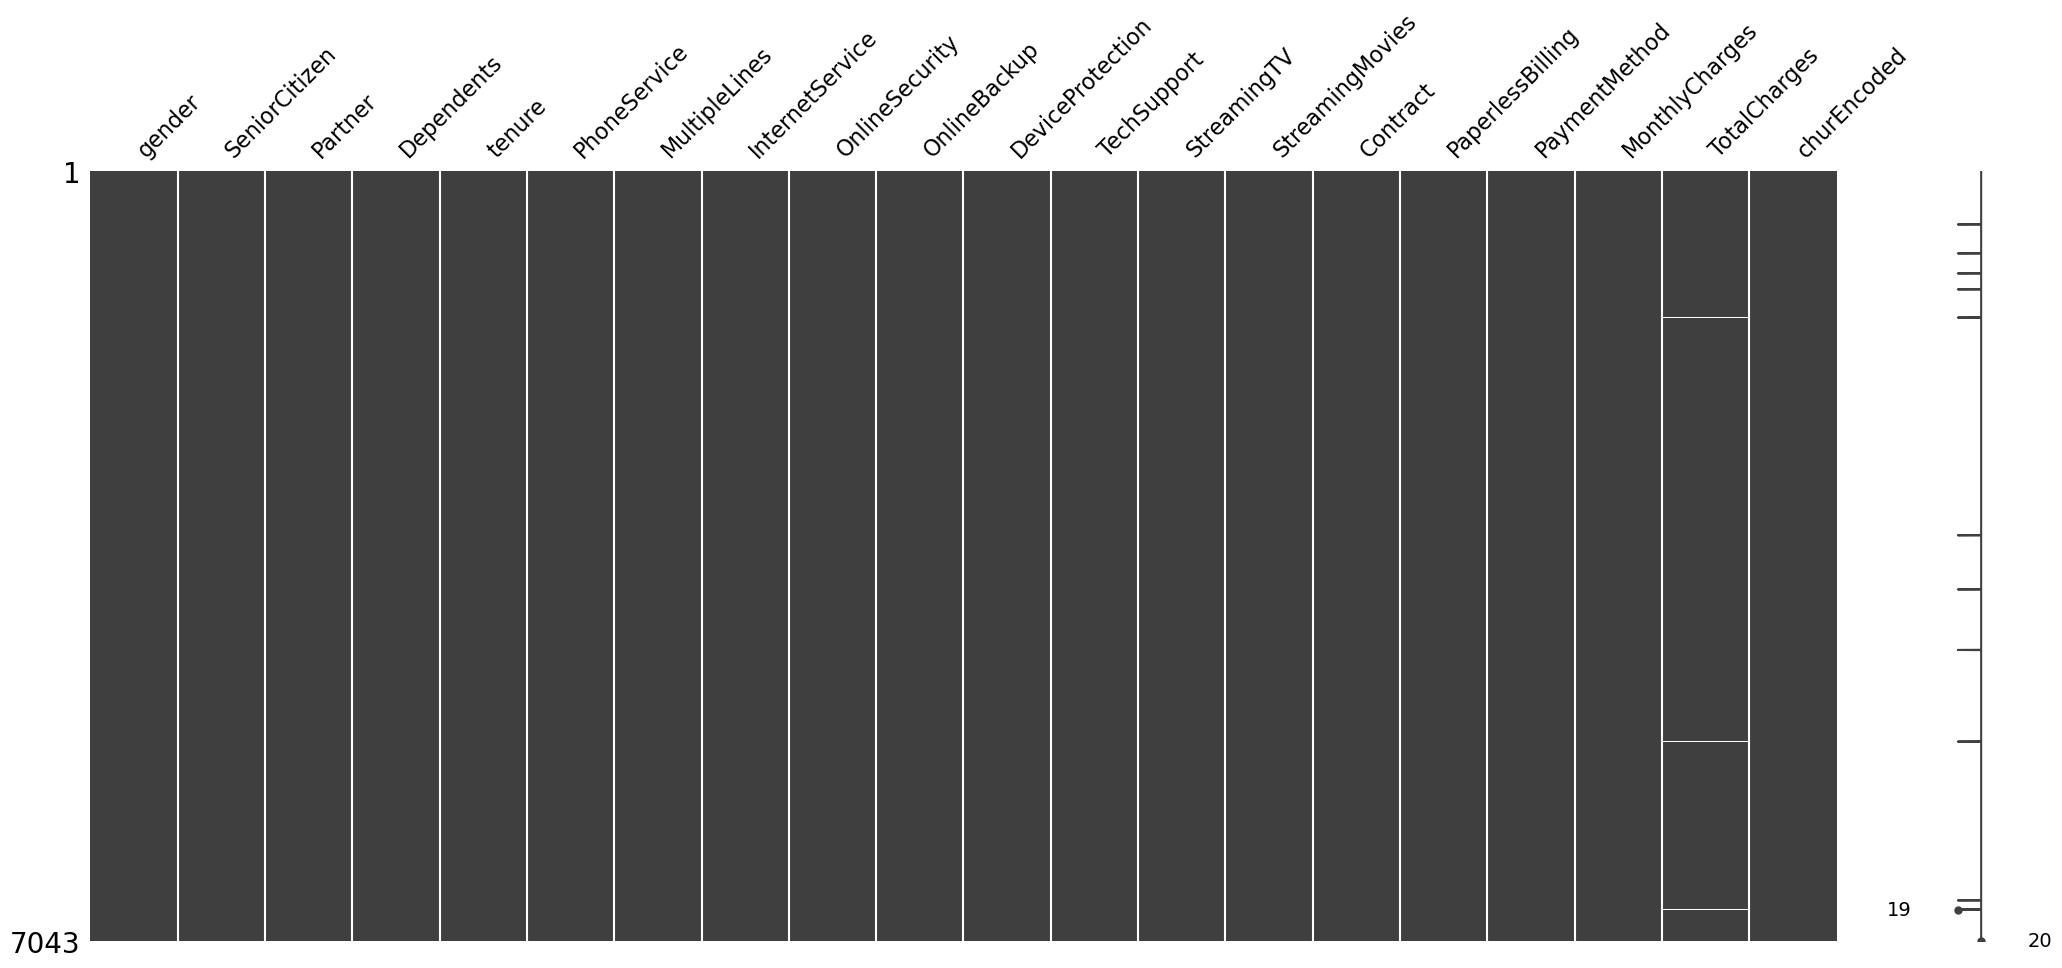

In [15]:
# Analizamos los valores nulos de TotalCharges
msno.matrix(df_client)

*3. La variable TotalCharges debemos eliminar los 11 registros porque son pocos registros.*

In [16]:
plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth": 0.5, "grid.alpha": 0.5})

churEncoded
0    0.73463
1    0.26537
Name: proportion, dtype: float64

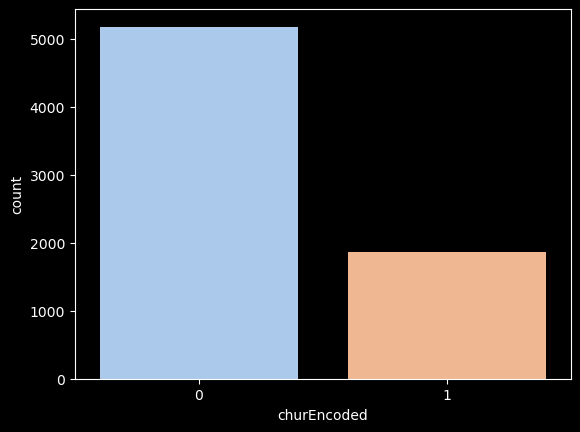

In [17]:
# Realizar la distribución de la variable Target.
sns.countplot(data= df_client, x= 'churEncoded', palette= 'pastel')
df_client['churEncoded'].value_counts(1).sort_index()

*4. El 74% de los clientes no han abandonado mientras que 26% de los clientes si lo hicieron.*

In [18]:
# Calcular más primera medidas estadísticas.
df_client.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churEncoded
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


*5.*
* De la variable "SeniorCitizen" más del 75% de los clientes no son adultos mayores.
* De las variables "tenure" y "MonthlyCharges", el promedio es mayor que la desviación estandar por lo que no existe valores atípicos extremos.

In [19]:
variables = ['churEncoded', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

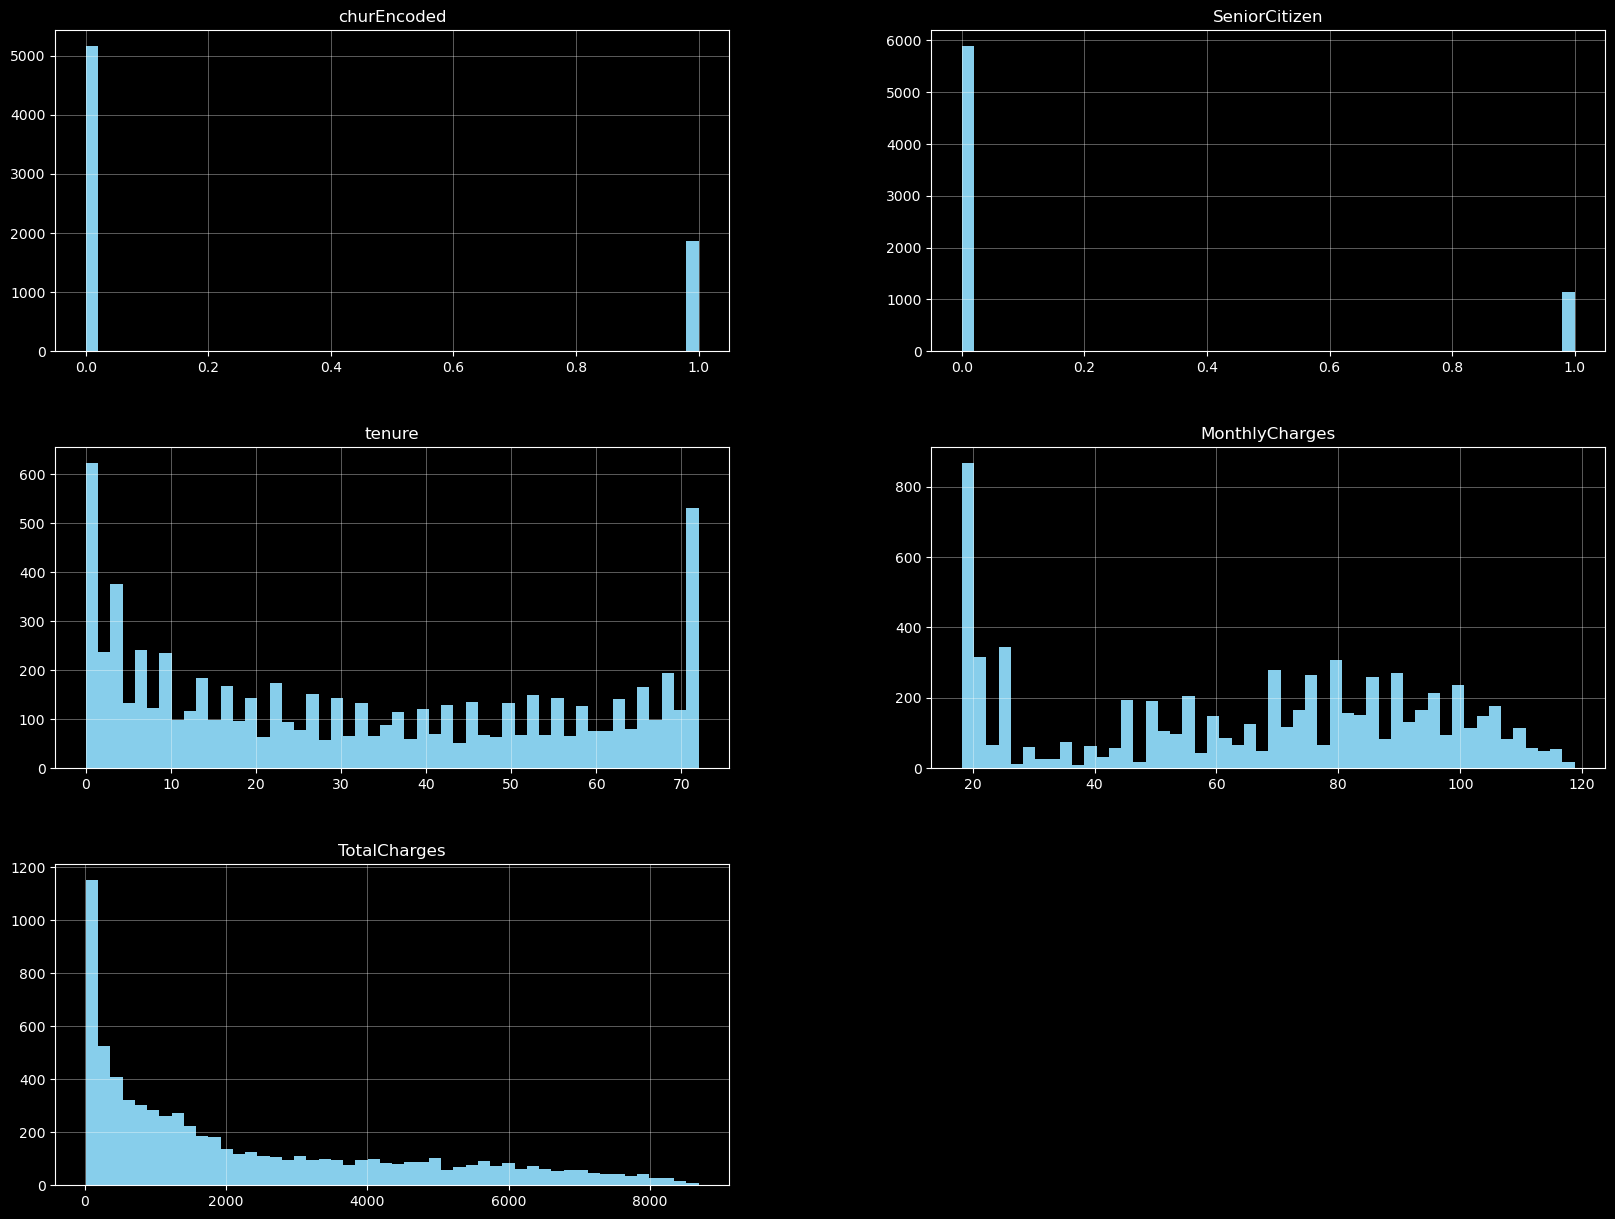

In [20]:
df_client[variables].hist(bins= 50, figsize= (20, 15), color= 'skyblue')
plt.show()

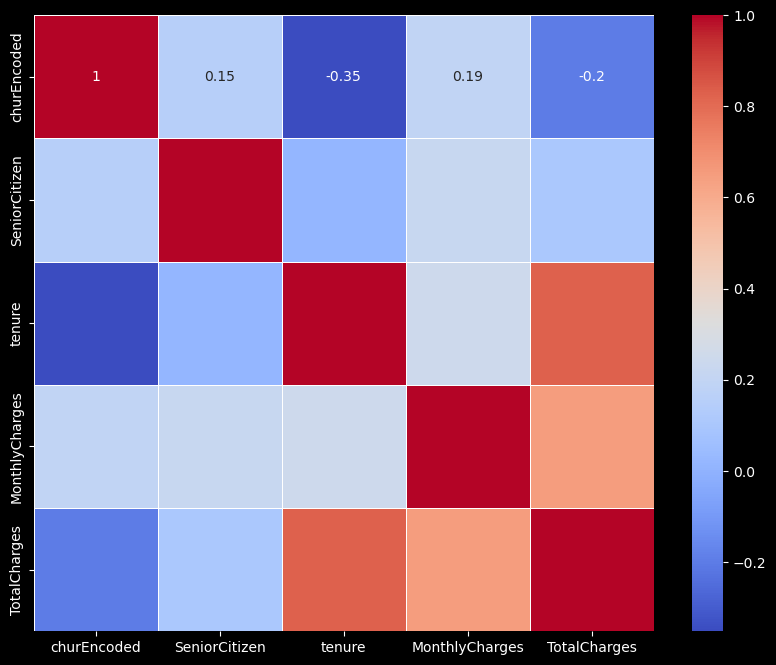

In [21]:
corr = df_client[variables].corr()
plt.figure(figsize= (10, 8))
sns.heatmap(corr, annot= True, cmap= 'coolwarm', linewidths= 0.5)
plt.show()

*6. Las variables numéricas que tienen más correlación con el target (abandono) son:*
- MonthyCharges (+).
- Tenure (-).

### 4.2. Variables Categóricas

In [22]:
categorical_attributes = df_client.select_dtypes(include= ['object'])

In [23]:
categorical_attributes.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

In [24]:
def hallazgoCategóricas(colsNameCategoricas):    
    for colName in colsNameCategoricas:        
        display(df_client[[colName, 'churEncoded']].groupby(colName).agg(['count', 'sum', 'mean']))

***Del total de clientes que fugaron representa un 26% del total de clientes***<br>
*7. Se afirma que tanto hombre como mujer fugaron en una misma proporción del 26%.*<br>
*8. Se afirma que el 32% de clientes que fugaron no tienen pareja.*<br>
*9. Se afirma que tanto clientes que tienen servicio telefónico o no fugaron en una misma proporción del 26%.*<br>
*10. Se afirma que el 28% de clientes que fugaron tienen multiplíneaas y las demás categorías están cerca del 25%.*<br>
*11. Se afirma que el 41% de clientes que fugaron tienen servicio de internet, 18% tienen DSL.*<br>
*12. Se afirma que el 41% de clientes que fugaron no tienen seguridad en línea.*<br>
*13. Se afirma que el 39% de clientes que fugaron no tienen protección de dispositivo.*<br>
*14. Se afirma que el 41% de clientes que fugaron no tienen soporte técnico.*<br>
*15. Se afriama que el 33% de clientes que fugaron no tienen trasmisión por TV.*<br>
*16. Se afriama que el 33% de clientes que fugaron no tienen trasmisión por películas.*<br>
*17. Se afirma que el 42% de clientes que fugaron tienen un contrato mensual.*<br>
*18. Se afirma que el 45% de clientes que fugaron pagan por cheque electrónico y las demás categorías están cerca al 19%.*

In [25]:
hallazgoCategóricas(categorical_attributes.columns)

churEncoded               
             count  sum      mean
gender                           
Female        3488  939  0.269209
Male          3555  930  0.261603

churEncoded                
              count   sum      mean
Partner                            
No             3641  1200  0.329580
Yes            3402   669  0.196649

churEncoded                
                 count   sum      mean
Dependents                            
No                4933  1543  0.312791
Yes               2110   326  0.154502

churEncoded                
                   count   sum      mean
PhoneService                            
No                   682   170  0.249267
Yes                 6361  1699  0.267096

churEncoded               
                       count  sum      mean
MultipleLines                              
No                      3390  849  0.250442
No phone service         682  170  0.249267
Yes                     2971  850  0.286099

churEncoded                
                      count   sum      mean
InternetService                            
DSL                    2421   459  0.189591
Fiber optic            3096  1297  0.418928
No                     1526   113  0.074050

churEncoded                
                          count   sum      mean
OnlineSecurity                                 
No                         3498  1461  0.417667
No internet service        1526   113  0.074050
Yes                        2019   295  0.146112

churEncoded                
                          count   sum      mean
OnlineBackup                                   
No                         3088  1233  0.399288
No internet service        1526   113  0.074050
Yes                        2429   523  0.215315

churEncoded                
                          count   sum      mean
DeviceProtection                               
No                         3095  1211  0.391276
No internet service        1526   113  0.074050
Yes                        2422   545  0.225021

churEncoded                
                          count   sum      mean
TechSupport                                    
No                         3473  1446  0.416355
No internet service        1526   113  0.074050
Yes                        2044   310  0.151663

churEncoded               
                          count  sum      mean
StreamingTV                                   
No                         2810  942  0.335231
No internet service        1526  113  0.074050
Yes                        2707  814  0.300702

churEncoded               
                          count  sum      mean
StreamingMovies                               
No                         2785  938  0.336804
No internet service        1526  113  0.074050
Yes                        2732  818  0.299414

churEncoded                
                     count   sum      mean
Contract                                  
Month-to-month        3875  1655  0.427097
One year              1473   166  0.112695
Two year              1695    48  0.028319

churEncoded                
                       count   sum      mean
PaperlessBilling                            
No                      2872   469  0.163301
Yes                     4171  1400  0.335651

churEncoded                
                                count   sum      mean
PaymentMethod                                        
Bank transfer (automatic)        1544   258  0.167098
Credit card (automatic)          1522   232  0.152431
Electronic check                 2365  1071  0.452854
Mailed check                     1612   308  0.191067

## 3. Tratamiento de Datos

### 3.0. Eliminar Columnas que no Aportan Información Relevante

In [26]:
df_client.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'churEncoded'],
      dtype='object')

In [27]:
categorical_attributes.drop(columns= ['OnlineBackup', 'PaperlessBilling', 'Dependents'], axis= 1, inplace= True)

### 3.1. Imputar los valores nulos

In [28]:
df_client['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [29]:
# Reemplazar por la media porque son solo 11 registros que tienen nulos.
df_client['TotalCharges'] = df_client['TotalCharges'].fillna(2283)

### 3.2. Recategorizar las variables numéricas

In [176]:
numeric_attributes = df_client[variables]

### 3.3. Convertir Variables Categóricas a Numéricas

In [47]:
categorical_attributes = categorical_attributes[categorical_attributes.columns].astype('category')

In [48]:
categorical_attributes['gender'] = categorical_attributes['gender'].cat.codes

In [49]:
categorical_attributes['Partner'] = categorical_attributes['Partner'].cat.codes

In [50]:
categorical_attributes['PhoneService'] = categorical_attributes['PhoneService'].cat.codes


In [51]:
map_contratos = {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
categorical_attributes['contratEncoder'] = categorical_attributes['Contract'].map(map_contratos)
categorical_attributes = categorical_attributes.drop(columns= ['Contract'], axis= 1)

In [52]:
categorical_attributes = pd.get_dummies(data= categorical_attributes, columns= ['MultipleLines', 'PaymentMethod', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineSecurity', 'InternetService'], dtype= int)

### 3.4. Escalar, Normalizar & Estandarizar las variables tenure, MonthlyCharges y TotalCharges

In [37]:
from sklearn.preprocessing import StandardScaler,  MinMaxScaler, RobustScaler, Normalizer

In [179]:
dict_data_procesada = {}

In [180]:
data_limpia = pd.concat([numeric_attributes, categorical_attributes], axis= 1)
dict_data_procesada['data_limpia'] = data_limpia

In [181]:
data_limpia_standard = data_limpia.copy()
escalada_standard = StandardScaler().fit_transform(numeric_attributes[['MonthlyCharges', 'TotalCharges', 'tenure']])
data_limpia_standard['MonthlyCharges'] = escalada_standard[:, 0]
data_limpia_standard['TotalCharges'] = escalada_standard[:, 1]
data_limpia_standard['tenure'] = escalada_standard[:, 2]
dict_data_procesada['data_escalada_standard'] = data_limpia_standard

In [182]:
data_limpia_minmax = data_limpia.copy()
escalada_minmax = MinMaxScaler().fit_transform(numeric_attributes[['MonthlyCharges', 'TotalCharges', 'tenure']])
data_limpia_minmax['MonthlyCharges'] = escalada_minmax[:, 0]
data_limpia_minmax['TotalCharges'] = escalada_minmax[:, 1]
data_limpia_minmax['tenure'] = escalada_minmax[:, 2]
dict_data_procesada['data_escalada_minmax'] = data_limpia_minmax

In [183]:

data_limpia_robust = data_limpia.copy()
escalada_robust = RobustScaler().fit_transform(numeric_attributes[['MonthlyCharges', 'TotalCharges', 'tenure']])
data_limpia_robust['MonthlyCharges'] = escalada_robust[:, 0]
data_limpia_robust['TotalCharges'] = escalada_robust[:, 1]
data_limpia_robust['tenure'] = escalada_robust[:, 2]
dict_data_procesada['data_escalada_robust'] = data_limpia_robust

In [184]:
data_limpia_normalizer = data_limpia.copy()
normalizer_vector = Normalizer().fit_transform(numeric_attributes[['MonthlyCharges', 'TotalCharges', 'tenure']].T).T
data_limpia_normalizer['MonthlyCharges'] = normalizer_vector[:, 0]
data_limpia_normalizer['TotalCharges'] = normalizer_vector[:, 1]
data_limpia_normalizer['tenure'] = normalizer_vector[:, 2]
dict_data_procesada['data_normalizer_vector'] = data_limpia_normalizer

In [185]:
for key in dict_data_procesada.keys():
    display(dict_data_procesada[key].head())

,churEncoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,PhoneService,contratEncoder,MultipleLines_No,...,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,29.85,29.85,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,0,0,34,56.95,1889.50,1,0,1,2,1,...,0,0,0,1,0,0,1,1,0,0
3668-QPYBK,1,0,2,53.85,108.15,1,0,1,1,1,...,0,1,0,0,0,0,1,1,0,0
7795-CFOCW,0,0,45,42.30,1840.75,1,0,0,2,0,...,1,0,0,1,0,0,1,1,0,0
9237-HQITU,1,0,2,70.70,151.65,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


,churEncoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,PhoneService,contratEncoder,MultipleLines_No,...,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,-1.277445,-1.160323,-0.994971,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,0,0,0.066327,-0.259629,-0.173875,1,0,1,2,1,...,0,0,0,1,0,0,1,1,0,0
3668-QPYBK,1,0,-1.236724,-0.362660,-0.960399,1,0,1,1,1,...,0,1,0,0,0,0,1,1,0,0
7795-CFOCW,0,0,0.514251,-0.746535,-0.195400,1,0,0,2,0,...,1,0,0,1,0,0,1,1,0,0
9237-HQITU,1,0,-1.236724,0.197365,-0.941193,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


,churEncoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,PhoneService,contratEncoder,MultipleLines_No,...,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,0.013889,0.115423,0.001275,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,0,0,0.472222,0.385075,0.215867,1,0,1,2,1,...,0,0,0,1,0,0,1,1,0,0
3668-QPYBK,1,0,0.027778,0.354229,0.010310,1,0,1,1,1,...,0,1,0,0,0,0,1,1,0,0
7795-CFOCW,0,0,0.625000,0.239303,0.210241,1,0,0,2,0,...,1,0,0,1,0,0,1,1,0,0
9237-HQITU,1,0,0.027778,0.521891,0.015330,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


,churEncoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,PhoneService,contratEncoder,MultipleLines_No,...,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,-0.608696,-0.745170,-0.405008,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,0,0,0.108696,-0.246550,0.144473,1,0,1,2,1,...,0,0,0,1,0,0,1,1,0,0
3668-QPYBK,1,0,-0.586957,-0.303588,-0.381873,1,0,1,1,1,...,0,1,0,0,0,0,1,1,0,0
7795-CFOCW,0,0,0.347826,-0.516099,0.130068,1,0,0,2,0,...,1,0,0,1,0,0,1,1,0,0
9237-HQITU,1,0,-0.586957,0.006440,-0.369019,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


,churEncoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,PhoneService,contratEncoder,MultipleLines_No,...,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,0.000293,0.004981,0.000111,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,0,0,0.009971,0.009503,0.007001,1,0,1,2,1,...,0,0,0,1,0,0,1,1,0,0
3668-QPYBK,1,0,0.000587,0.008986,0.000401,1,0,1,1,1,...,0,1,0,0,0,0,1,1,0,0
7795-CFOCW,0,0,0.013197,0.007058,0.006820,1,0,0,2,0,...,1,0,0,1,0,0,1,1,0,0
9237-HQITU,1,0,0.000587,0.011797,0.000562,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


## 4. Selección de Datos

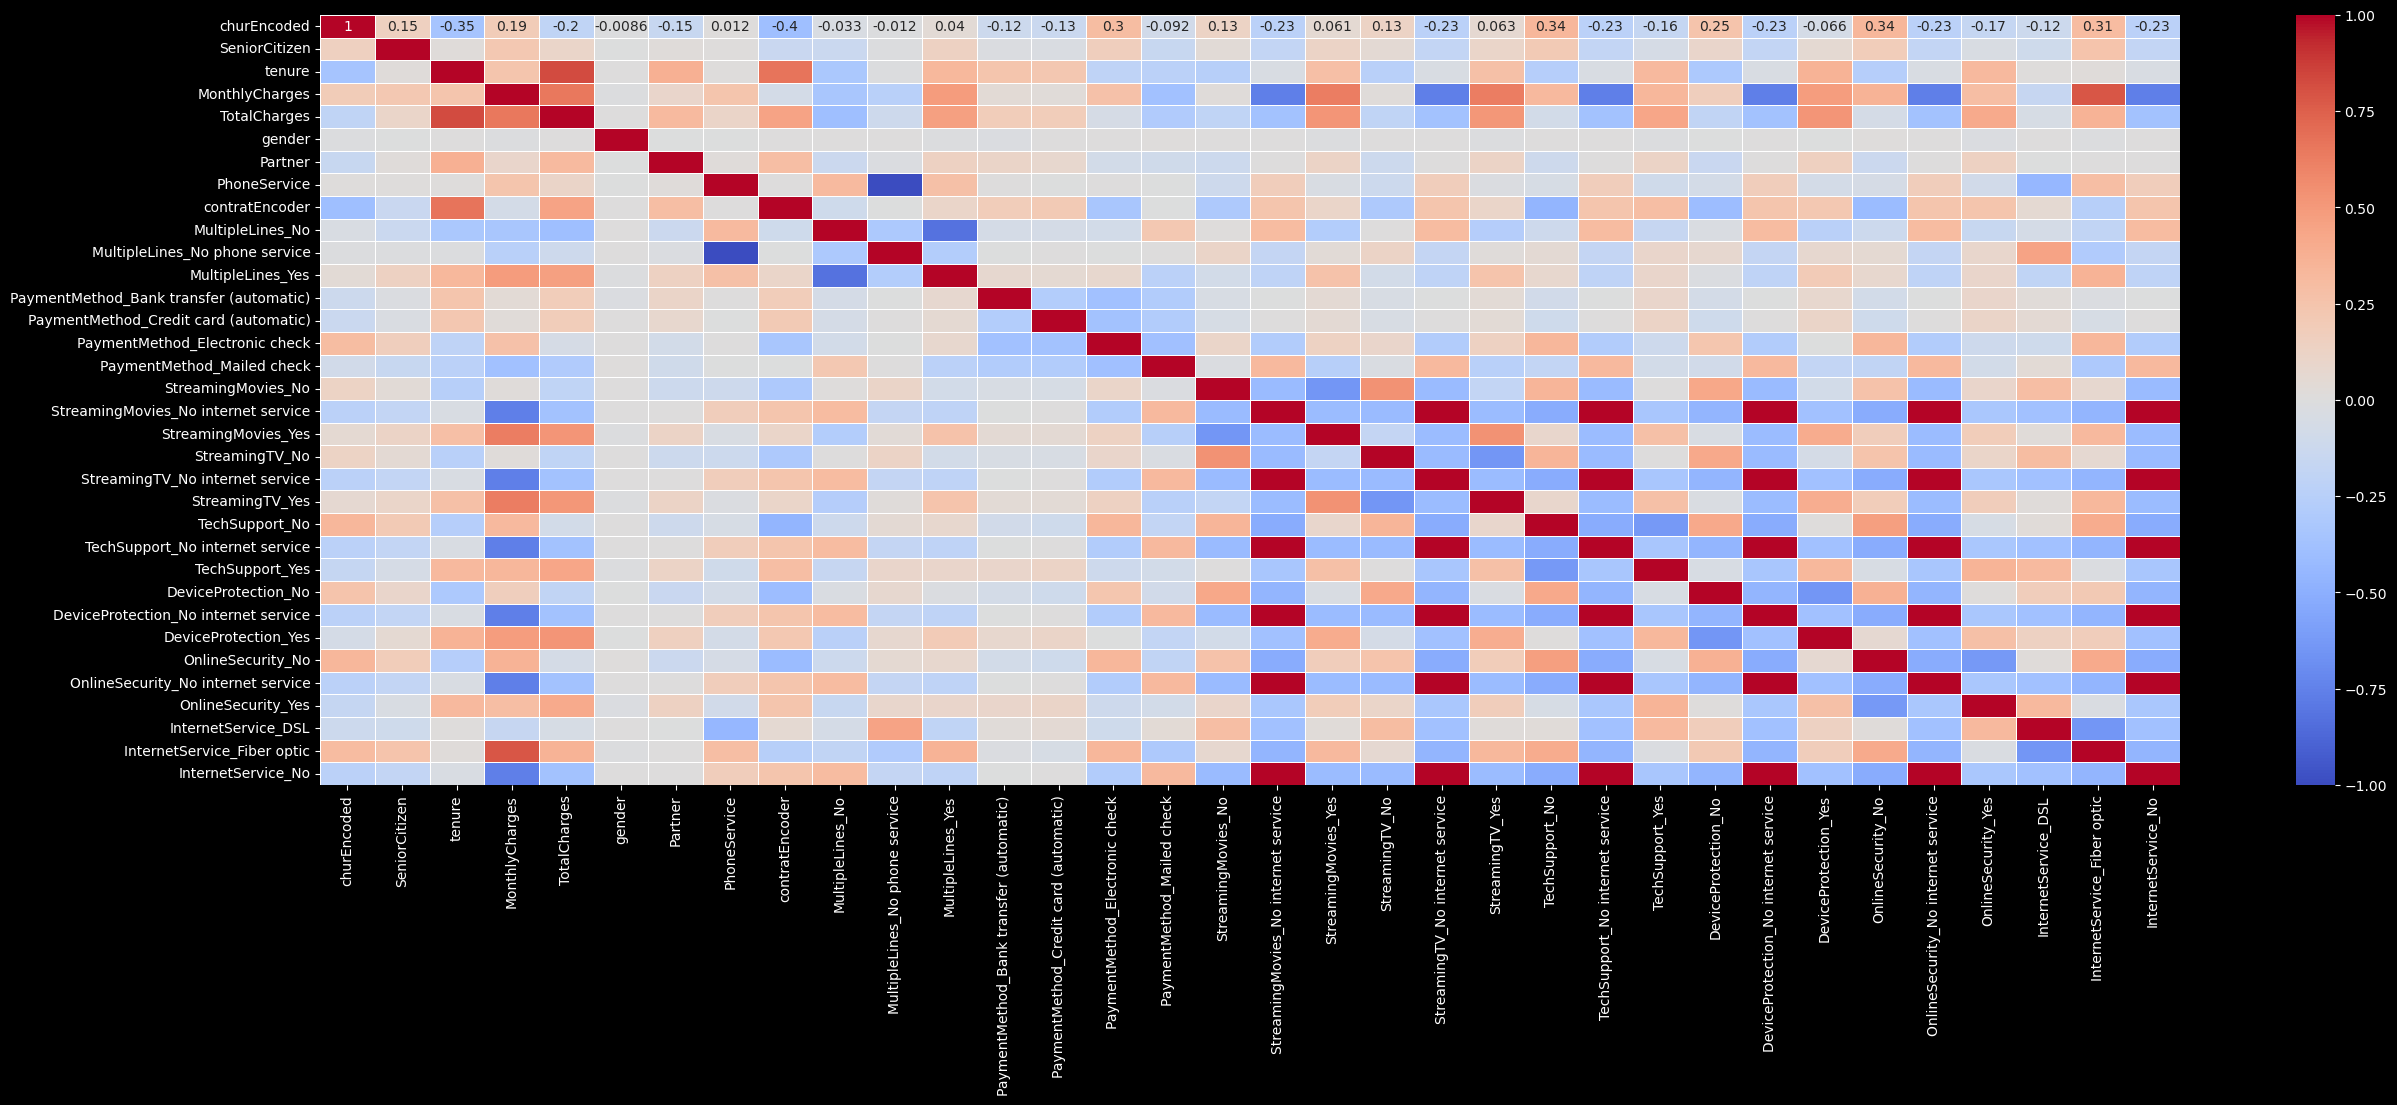

In [186]:
corr = dict_data_procesada['data_normalizer_vector'].corr()
plt.figure(figsize= (30, 10))
sns.heatmap(corr, annot= True, cmap= 'coolwarm', linewidths= 0.5)
plt.show()

In [225]:
from sklearn.feature_selection import SelectKBest, chi2

X = dict_data_procesada['data_escalada_minmax'].drop(columns= ['churEncoded'], axis= 1)
y = dict_data_procesada['data_escalada_minmax']['churEncoded']

transformer = SelectKBest(k= 10)
X_new = transformer.fit_transform(X, y)

seleccionadas = transformer.get_support(indices= True)
print(X.columns[seleccionadas])

Index(['tenure', 'contratEncoder', 'PaymentMethod_Electronic check',
       'TechSupport_No', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')


In [228]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = {}, {}, {}, {}

for key in dict_data_procesada.keys():
    X = dict_data_procesada[key][['tenure', 'contratEncoder', 'PaymentMethod_Electronic check',
       'TechSupport_No', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'InternetService_Fiber optic',
       'InternetService_No']]
    y = dict_data_procesada[key]['churEncoded']

    X_train[key], X_test[key], y_train[key], y_test[key] = model_selection.train_test_split(X, y, train_size= 0.75, test_size= 0.25, random_state= 42)    

## 5. Balanceo de Datos: Oversampling y Undersampling